# Advertising Sales Channel Prediction

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading data
ad=pd.read_csv("Advertising.csv")
ad

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
ad.shape

(200, 5)

In [4]:
ad.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
ad.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [6]:
ad.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [7]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


# EDA:

# Visualization:

<AxesSubplot:xlabel='TV', ylabel='sales'>

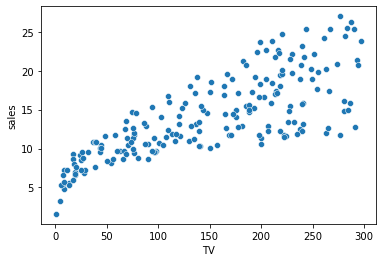

In [8]:
sns.scatterplot(x='TV',y='sales',data=ad)

<AxesSubplot:xlabel='radio', ylabel='sales'>

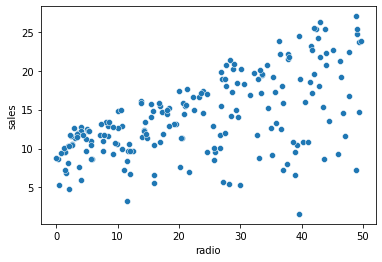

In [9]:
sns.scatterplot(x='radio',y='sales',data=ad)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

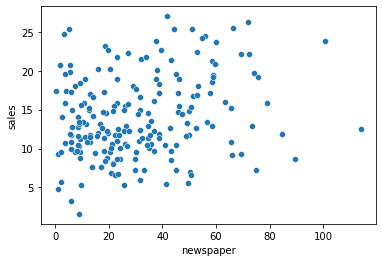

In [10]:
sns.scatterplot(x='newspaper',y='sales',data=ad)

# Correlation:

In [11]:
ad.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


Correlation using heatmap:

<AxesSubplot:>

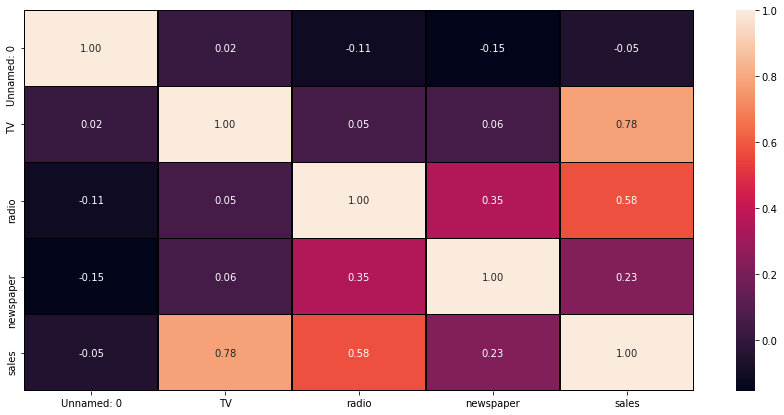

In [12]:
plt.figure(figsize=(15,7))
sns.heatmap(ad.corr(),annot=True,linewidth=0.5,linecolor="black",fmt='.2f')

Outcome of correlation:

# Describing Dataset:

In [13]:
ad.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


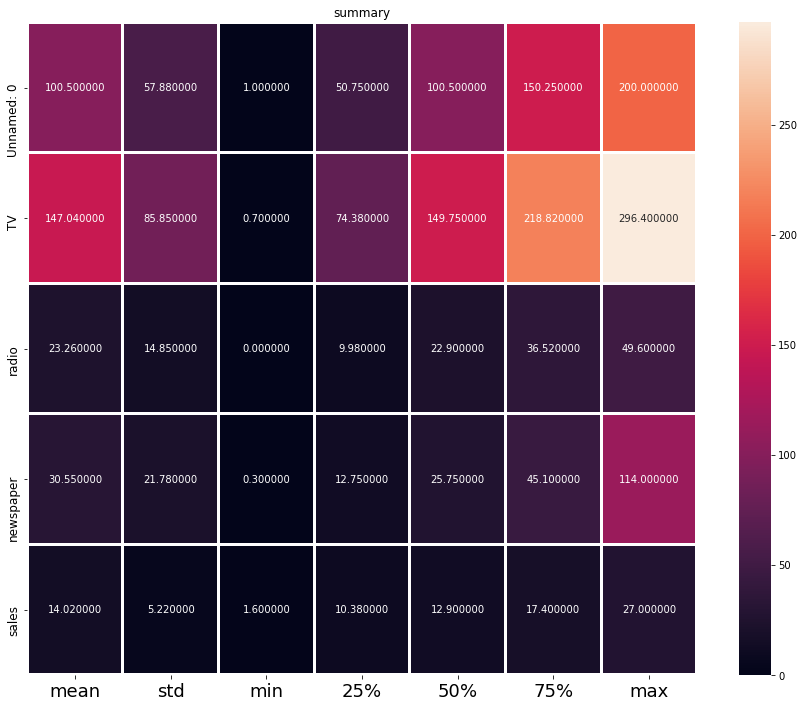

In [14]:
plt.figure(figsize=(15,12))
sns.heatmap(round(ad.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("summary")
plt.show()

Outcome of describe of dataset:

# Outliers Checking:

<AxesSubplot:>

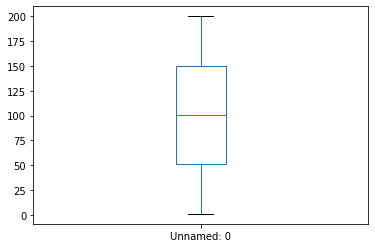

In [15]:
ad["Unnamed: 0"].plot.box()

<AxesSubplot:>

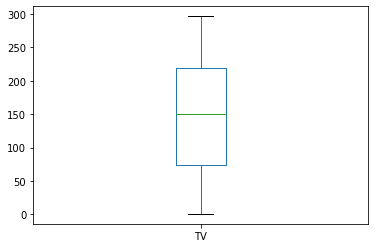

In [16]:
ad["TV"].plot.box()

<AxesSubplot:>

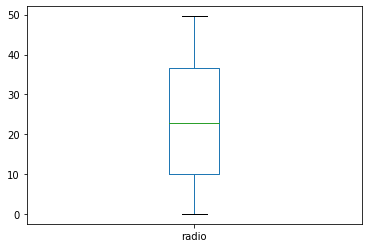

In [17]:
ad["radio"].plot.box()

<AxesSubplot:>

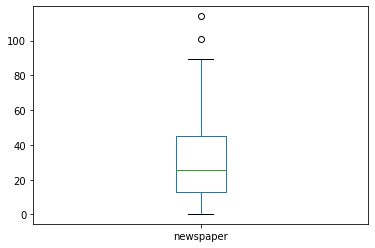

In [18]:
ad["newspaper"].plot.box()

<AxesSubplot:>

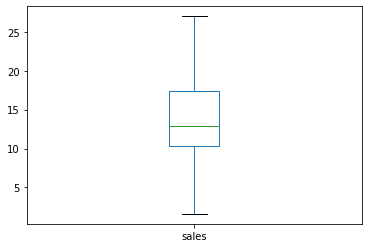

In [19]:
ad["sales"].plot.box()

We can see from the above observation that only newspaper column has few outliers and no other columns has outliers.

# Skewness:

In [20]:
ad.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

 Outcome of skewness: 
    

# Normal Distribution Curve:

<AxesSubplot:xlabel='TV', ylabel='Density'>

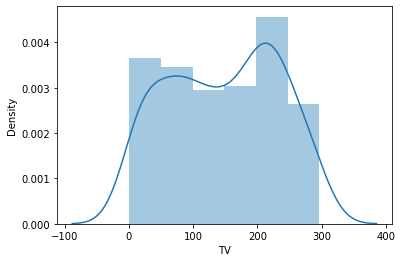

In [21]:
sns.distplot(ad["TV"])

The data of the column is not normalised. The building block is out of the normalized curve.

<AxesSubplot:xlabel='radio', ylabel='Density'>

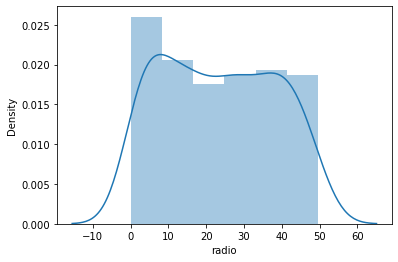

In [22]:
sns.distplot(ad["radio"])

The data of the column is not normalised. The building block is out of the normalized curve.

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

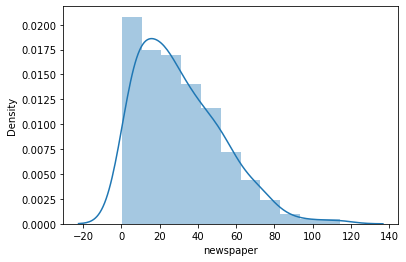

In [23]:
sns.distplot(ad["newspaper"])

The data of the column is not normalised. The building block is out of the normalized curve.

<AxesSubplot:xlabel='sales', ylabel='Density'>

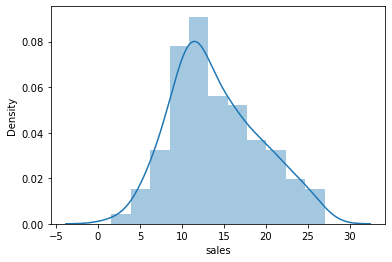

In [24]:
sns.distplot(ad["sales"])

The data of the column is not normalised. The building block is out of the normalized curve.

# Data Cleaning:

In [25]:
ad=ad.drop(["Unnamed: 0"],axis=1)

In [26]:
ad

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Removing Outliers:

Z-Score Technique:

In [27]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(ad))
z.shape

(200, 4)

In [28]:
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [29]:
ad_new=ad[(z<3).all(axis=1)]
print(ad.shape)
print(ad_new.shape)

(200, 4)
(198, 4)


Percentage Data Loss:

In [30]:
loss_percent=(200-198)/200*100
print(loss_percent)

1.0


IQR Technique:

In [31]:
q1=ad.quantile(0.25)
q3=ad.quantile(0.75)

IQR=q3-q1
print(IQR)

TV           144.450
radio         26.550
newspaper     32.350
sales          7.025
dtype: float64


In [32]:
ad_new1=ad[~((ad<(q1-1.5*IQR)) | (ad>(q3+1.5*IQR))).any(axis=1)]
print(ad_new1.shape)

(198, 4)


In [33]:
loss_percent=(200-198)/200*100
print(loss_percent)

1.0


Both Z-Score and IQR has same percentage of data loss, we can choose any of them.

# Dividing data in features and vector

In [34]:
x=ad_new.iloc[:,:-1]
y=ad_new.iloc[:,-1]

In [35]:
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [36]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

# Transforming data to remove skewness:

In [37]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [38]:
x

array([[ 0.95598306,  0.9691098 ,  1.6041965 ],
       [-1.19200349,  1.04623436,  0.83104401],
       [-1.6461253 ,  1.37296802,  1.60705249],
       [ 0.14293428,  1.1473316 ,  1.28376774],
       [ 0.45645241, -0.73502642,  1.28062154],
       [-1.8204008 ,  1.51543955,  1.76610727],
       [-1.00349358,  0.70309642, -0.10205346],
       [-0.20996049, -0.0876566 , -0.84968895],
       [-1.82264543, -1.62948287, -2.09866461],
       [ 0.652694  , -1.56152179, -0.22649933],
       [-0.88482761, -1.19258569, -0.06553382],
       [ 0.80322028,  0.19357553, -1.59608414],
       [-1.52567125,  0.82725998,  1.50859232],
       [-0.48090308, -1.01613619, -1.23269654],
       [ 0.69642374,  0.70856268,  0.86367455],
       [ 0.60769456,  1.45886692,  1.1026083 ],
       [ 1.44702338,  1.06152278,  1.19771741],
       [-0.84304109, -0.02834315, -0.39458775],
       [ 0.09676151,  0.18741189, -0.346834  ],
       [ 0.84017479,  0.41523303,  1.11921444],
       [ 1.02746612, -1.2660875 , -0.102

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.95598306,  0.9691098 ,  1.6041965 ],
       [-1.19200349,  1.04623436,  0.83104401],
       [-1.6461253 ,  1.37296802,  1.60705249],
       [ 0.14293428,  1.1473316 ,  1.28376774],
       [ 0.45645241, -0.73502642,  1.28062154],
       [-1.8204008 ,  1.51543955,  1.76610727],
       [-1.00349358,  0.70309642, -0.10205346],
       [-0.20996049, -0.0876566 , -0.84968895],
       [-1.82264543, -1.62948287, -2.09866461],
       [ 0.652694  , -1.56152179, -0.22649933],
       [-0.88482761, -1.19258569, -0.06553382],
       [ 0.80322028,  0.19357553, -1.59608414],
       [-1.52567125,  0.82725998,  1.50859232],
       [-0.48090308, -1.01613619, -1.23269654],
       [ 0.69642374,  0.70856268,  0.86367455],
       [ 0.60769456,  1.45886692,  1.1026083 ],
       [ 1.44702338,  1.06152278,  1.19771741],
       [-0.84304109, -0.02834315, -0.39458775],
       [ 0.09676151,  0.18741189, -0.346834  ],
       [ 0.84017479,  0.41523303,  1.11921444],
       [ 1.02746612, -1.2660875 , -0.102

# MODEL BUILDING:

# Linear Regression:

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

# Splitting the dataframe:

In [41]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At random state:",i)
        print("Training r2_score is:",r2_score(y_train,pred_train*100))
        print("Testing r2_score is:",r2_score(y_test,pred_test*100))

At random state: 79
Training r2_score is: -77618.55208727141
Testing r2_score is: -92958.05254059202
At random state: 112
Training r2_score is: -76192.65156892977
Testing r2_score is: -107865.01554659515
At random state: 137
Training r2_score is: -80989.7183055414
Testing r2_score is: -80980.70190060581
At random state: 151
Training r2_score is: -75279.03984218785
Testing r2_score is: -108862.09861938281
At random state: 235
Training r2_score is: -83852.6644990956
Testing r2_score is: -68698.17967211721
At random state: 243
Training r2_score is: -76804.88891595992
Testing r2_score is: -98594.66933186137
At random state: 280
Training r2_score is: -83555.33894898661
Testing r2_score is: -75245.99330471686
At random state: 341
Training r2_score is: -80258.79011318699
Testing r2_score is: -80173.81938992455
At random state: 492
Training r2_score is: -79291.92790485031
Testing r2_score is: -98245.99011718495
At random state: 510
Training r2_score is: -81326.77673182849
Testing r2_score is: 

In [42]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_test))
print('Mean Squared Error:',mean_squared_error(y_test,pred_test))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_test)))

Error:
Mean Absolute Error: 1.242480301837905
Mean Squared Error: 2.757877930911765
Root Mean Square Error: 1.6606859820302469


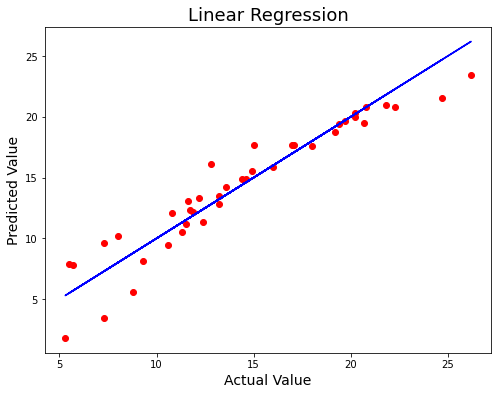

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Value',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

We can see that the values does not lie on the linear line. We will approach more regressors

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=137)

# Regularization:

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# 1.Lasso:

In [46]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [47]:
ls = Lasso(alpha=0.1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lss = r2_score(y_test,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x,y,cv=j)
    lsc = lsscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100 )
    print("R2_score is :-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 90.14616379006017
R2_score is :- 90.11410397540224


At cv:- 3
Cross validation score is:- 89.72351383573026
R2_score is :- 90.11410397540224


At cv:- 4
Cross validation score is:- 89.80785666814384
R2_score is :- 90.11410397540224


At cv:- 5
Cross validation score is:- 89.57805874289184
R2_score is :- 90.11410397540224


At cv:- 6
Cross validation score is:- 89.81682352909685
R2_score is :- 90.11410397540224


At cv:- 7
Cross validation score is:- 89.46701250358076
R2_score is :- 90.11410397540224


At cv:- 8
Cross validation score is:- 89.81744733610321
R2_score is :- 90.11410397540224


At cv:- 9
Cross validation score is:- 89.36472532637083
R2_score is :- 90.11410397540224




In [48]:
print("At cv:",2)
print("Cross validation score is:",90.14616379006017)
print("R2_Score is:",90.11410397540224)

At cv: 2
Cross validation score is: 90.14616379006017
R2_Score is: 90.11410397540224


In [49]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_ls))
print('Mean Squared Error:',mean_squared_error(y_test,pred_ls))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_ls)))

Error:
Mean Absolute Error: 1.4701577626015052
Mean Squared Error: 2.9905107336548857
Root Mean Square Error: 1.729309322722481


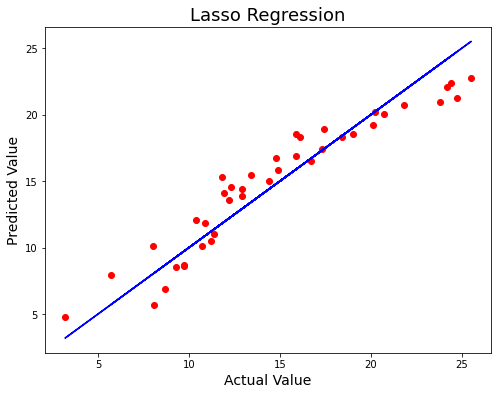

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_ls, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Value',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

# 2.Ridge:

In [51]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':[0,1,2,3,4,5,6,7,8,9]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [52]:
rd = Ridge(alpha=0.01, copy_X= True, fit_intercept= True, normalize=False, random_state= 0, tol= 0.001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd = rd.predict(x_test)

rds = r2_score(y_test,pred_rd)
print('R2 Score:',rds*100)

rdscore = cross_val_score(rd,x,y,cv=2)
rdc = rdscore.mean() 
print('Cross Val Score:',rdc*100)

R2 Score: 90.38756847284914
Cross Val Score: 90.17062851759303


In [53]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_rd)))

Error:
Mean Absolute Error: 1.4542845051702271
Mean Squared Error: 2.907786971149838
Root Mean Square Error: 1.705223437309562


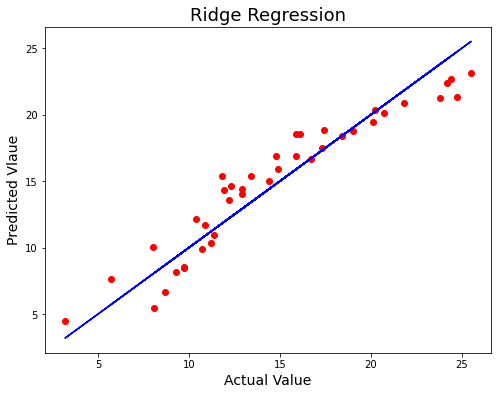

In [54]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_rd, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Vlaue',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()


We can see that the data points does not lie on the best fit line.

# Approaching more Regressors:

In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor

# 1.Decision Tree Regressor:

In [56]:
dtr=DecisionTreeRegressor(criterion='mse',splitter='best')
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
pred_dtr = dtr.predict(x_test)

dtr_r2 = r2_score(y_test,pred_dtr)
print('R2 Score:',dtr_r2*100)

dtrscore = cross_val_score(dtr,x,y,cv=2)
dtrcc = dtrscore.mean() 
print('Cross Val Score:',dtrcc*100)

R2 Score: 96.84465678411188
Cross Val Score: 90.66422699165338


In [57]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_dtr))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_dtr)))

Error:
Mean Absolute Error: 0.7299999999999998
Mean Squared Error: 0.9544999999999998
Root Mean Square Error: 0.9769851585361979


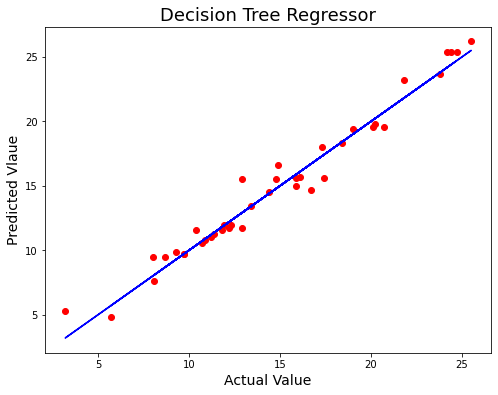

In [58]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_dtr, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Vlaue',fontsize=14)
plt.title('Decision Tree Regressor',fontsize=18)
plt.show()

# 2.KNeighbors Regressor:

In [59]:
knr=KNeighborsRegressor(n_neighbors=5,algorithm='auto')
knr.fit(x_train,y_train)
knr.score(x_train,y_train)
pred_knr = knr.predict(x_test)

knr_r2 = r2_score(y_test,pred_knr)
print('R2 Score:',knr_r2*100)

knrscore = cross_val_score(knr,x,y,cv=2)
knrcc = knrscore.mean() 
print('Cross Val Score:',knrcc*100)

R2 Score: 93.490604630867
Cross Val Score: 92.68425872441632


In [60]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_knr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_knr))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_knr)))

Error:
Mean Absolute Error: 0.9295000000000002
Mean Squared Error: 1.9691100000000006
Root Mean Square Error: 1.4032497995724071


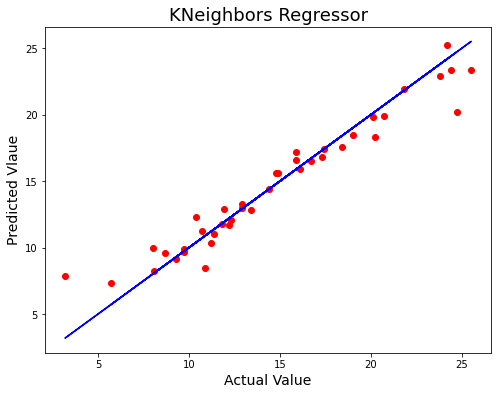

In [61]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_knr, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Vlaue',fontsize=14)
plt.title('KNeighbors Regressor',fontsize=18)
plt.show()


# 3.SVR:

In [62]:
svr=SVR()
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_svr = svr.predict(x_test)

svr_r2 = r2_score(y_test,pred_svr)
print('R2 Score:',svr_r2*100)

svr_score = cross_val_score(svr,x,y,cv=2)
svr_cc = svr_score.mean() 
print('Cross Val Score:',svr_cc*100)

R2 Score: 90.67531486663313
Cross Val Score: 86.60284441799949


In [63]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_svr))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_svr)))

Error:
Mean Absolute Error: 1.0003268327763835
Mean Squared Error: 2.8207428957275953
Root Mean Square Error: 1.6795067417928382


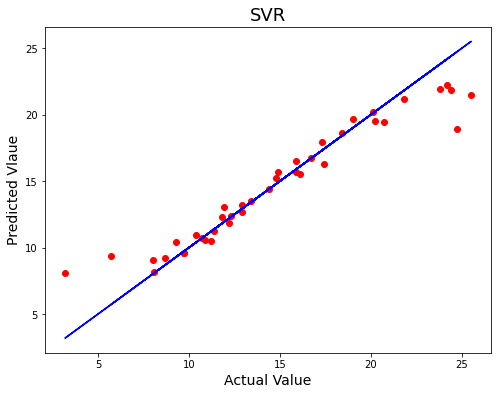

In [64]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_svr, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Vlaue',fontsize=14)
plt.title('SVR',fontsize=18)
plt.show()

Here, most of the data points lie on the best fit line.

# 4.SGD Regressor:

In [65]:
sgd=SGDRegressor()
sgd.fit(x_train,y_train)
sgd.score(x_train,y_train)
pred_sgd = sgd.predict(x_test)

sgd_r2 = r2_score(y_test,pred_sgd)
print('R2 Score:',sgd_r2*100)

sgd_score = cross_val_score(sgd,x,y,cv=2)
sgd_cc = sgd_score.mean() 
print('Cross Val Score:',sgd_cc*100)

R2 Score: 90.38307618897397
Cross Val Score: 90.2050818722557


In [66]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_sgd))
print('Mean Squared Error:',mean_squared_error(y_test,pred_sgd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_sgd)))

Error:
Mean Absolute Error: 1.4543009266631937
Mean Squared Error: 2.909145899375852
Root Mean Square Error: 1.7056218512248993


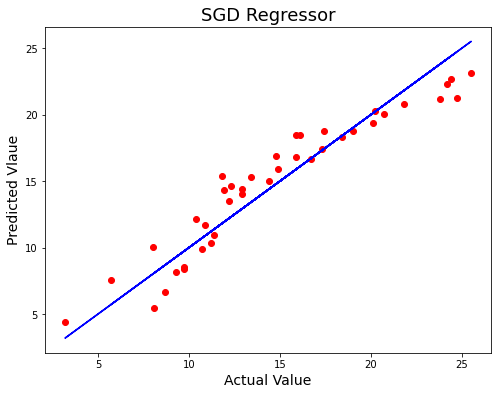

In [67]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_sgd, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Vlaue',fontsize=14)
plt.title('SGD Regressor',fontsize=18)
plt.show()

# Ensemble Methods:

# 1.Random Forest Regressor:

In [68]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,criterion='mse')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf = rf.predict(x_test)

rf_r2 = r2_score(y_test,pred_rf)
print('R2 Score:',rf_r2*100)

rf_score = cross_val_score(rf,x,y,cv=2)
rf_cc = rf_score.mean() 
print('Cross Val Score:',rf_cc*100)

R2 Score: 97.98943860840936
Cross Val Score: 97.24020542624275


In [69]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rf))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rf))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_rf)))

Error:
Mean Absolute Error: 0.6283999999999994
Mean Squared Error: 0.6082003499999995
Root Mean Square Error: 0.7798720087296374


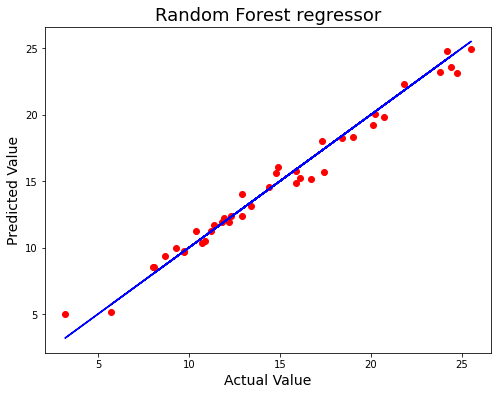

In [70]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_rf, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Value',fontsize=14)
plt.title('Random Forest regressor',fontsize=18)
plt.show()

# 2.ADA Boost Regressor:

In [71]:
from sklearn.ensemble import AdaBoostRegressor

ada=AdaBoostRegressor(n_estimators=50)
ada.fit(x_train,y_train)
ada.score(x_train,y_train)
pred_ada = ada.predict(x_test)

ada_r2 = r2_score(y_test,pred_ada)
print('R2 Score:',ada_r2*100)

ada_score = cross_val_score(ada,x,y,cv=2)
ada_cc = ada_score.mean() 
print('Cross Val Score:',ada_cc*100)

R2 Score: 96.48646053836714
Cross Val Score: 95.0424086140115


In [72]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_ada))
print('Mean Squared Error:',mean_squared_error(y_test,pred_ada))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_ada)))

Error:
Mean Absolute Error: 0.8781760894732556
Mean Squared Error: 1.0628553493774568
Root Mean Square Error: 1.030948761761445


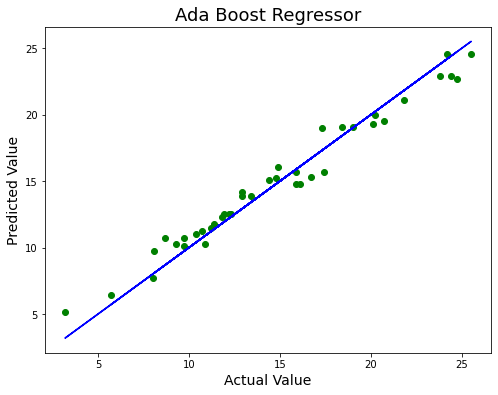

In [73]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_ada, color='g')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Value',fontsize=14)
plt.title('Ada Boost Regressor',fontsize=18)
plt.show()

# 3.Gradient Boosting Regressor:

In [74]:
from sklearn.ensemble import GradientBoostingRegressor
gbr= GradientBoostingRegressor(criterion='friedman_mse',loss='huber',n_estimators=200)
gbr.fit(x_train, y_train)
gbr.score(x_train, y_train)
pred_gbr =gbr.predict(x_test)

gbrs= r2_score(y_test,pred_gbr)
print('R2 Score:',gbrs*100)

gbscore = cross_val_score(gbr,x,y,cv=2)
gbrc= gbscore.mean() 
print('Cross Val Score:',gbrc*100)

R2 Score: 97.7972026485454
Cross Val Score: 97.23126870894194


In [75]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_gbr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_gbr))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_gbr)))

Error:
Mean Absolute Error: 0.6374063532038032
Mean Squared Error: 0.6663522565077362
Root Mean Square Error: 0.8163040221067983


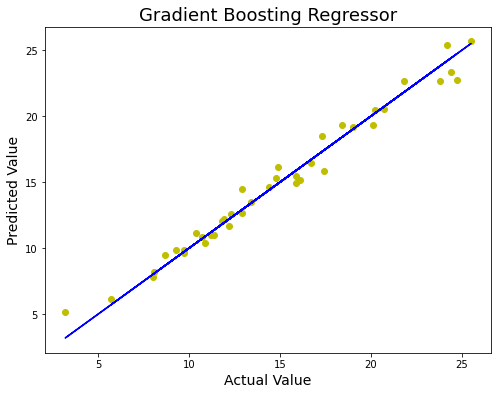

In [76]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_gbr, color='y')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Value',fontsize=14)
plt.title('Gradient Boosting Regressor',fontsize=18)
plt.show()

The best model is Gradient Boosting Regressor. Since the difference between the percentage score of cross validation and r2_score is optimum.

# Model Saving:

In [77]:
import pickle
filename = 'sale_prediction.pkl'
pickle.dump(gbr, open(filename, 'wb'))

# Conclusion:

In [78]:
import numpy as np
a=np.array(y_test)
a

array([11.4, 14.4,  8. , 18.4,  9.3, 15.9, 10.9, 11.9, 17.4, 20.1, 24.2,
        9.7,  8.1, 14.9, 16.1, 12.9,  9.7, 10.7,  5.7, 16.7, 20.2, 19. ,
       13.4,  3.2, 12.9, 15.9, 14.8, 21.8, 11.2, 17.3, 24.4, 11.8, 25.5,
        8.7, 10.4, 23.8, 12.2, 12.3, 24.7, 20.7])

In [79]:
predicted=np.array(gbr.predict(x_test))
predicted

array([11.00709564, 14.64772131,  7.84791559, 19.33550414,  9.82866333,
       15.45478769, 10.39170939, 12.24341262, 15.86612904, 19.3576058 ,
       25.38511563,  9.61043981,  8.21857421, 16.15933797, 15.19904996,
       14.46593655,  9.86917106, 10.88249456,  6.15120499, 16.48852626,
       20.48489495, 19.2032397 , 13.47337992,  5.14931835, 12.64398793,
       14.93264858, 15.33752217, 22.62346802, 10.98081365, 18.4893195 ,
       23.35925787, 12.04347323, 25.65481514,  9.49722527, 11.12424992,
       22.67744524, 11.71699768, 12.59360081, 22.72708214, 20.50389694])

In [80]:
ad_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
ad_com

,original,predicted
0,11.4,11.007096
1,14.4,14.647721
2,8.0,7.847916
3,18.4,19.335504
4,9.3,9.828663
5,15.9,15.454788
6,10.9,10.391709
7,11.9,12.243413
8,17.4,15.866129
9,20.1,19.357606


# From the above table, the model is predicted with 97% percent accuracy.